In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.175, random_state=35)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, min_samples_split=2), n_estimators=32, learning_rate=0.1, algorithm='SAMME.R', random_state=35)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and AdaBoost classifier
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Perform 10-fold cross-validation
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Fit the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation:", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_qt_ab=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensembl

Cross-validation scores: [0.95833333 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean CV accuracy: 0.9958333333333333


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Testing Set Accuracy with cross-validation: 0.9807692307692307
printing precision
0.9827586206896552
f1-score
0.9805897723030981
Testing Set Accuracy without cross-validation: 0.9807692307692307
Testing Set Accuracy without cross-validation: 0.9807692307692307
ROC AUC: 1.0
recall
0.9791666666666667
kappa score
0.9611940298507463
log loss
0.07685805066030249
MCC
0.9619185809213996


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.26, random_state=33)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=None, min_samples_split=4,random_state=39)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Decision Tree classifier for training and testing
pipeline_cv_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_dt = cross_val_score(pipeline_cv_dt, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Decision Tree):", cv_scores_dt)
print("Mean CV accuracy (Decision Tree):", np.mean(cv_scores_dt))

# Train the model on the entire training set using pipeline_cv_dt
pipeline_cv_dt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test_dt = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Decision Tree):", test_accuracy_test_dt)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_qt_dt=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_dt.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Decision Tree): [0.95454545 1.         0.90909091 0.95454545 1.         0.95454545
 0.95238095 0.95238095 1.         0.9047619 ]
Mean CV accuracy (Decision Tree): 0.9582251082251083
Testing Set Accuracy with cross-validation (Decision Tree): 0.9605263157894737
printing precision
0.9651162790697674
f1-score
0.9601885804085909
Testing Set Accuracy without cross-validation: 0.9605263157894737
Testing Set Accuracy without cross-validation: 0.9605263157894737
ROC AUC: 0.9583333333333333
recall
0.9583333333333333
kappa score
0.9205020920502092
log loss
1.4227757916756774
MCC
0.9234247009337435


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.28, random_state=31)

# Define Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', QuantileTransformer())  # Use QuantileTransformer instead of Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and GNB classifier for training and testing
pipeline_gnb_quantile = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gnb)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_gnb = cross_val_score(pipeline_gnb_quantile, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (GNB with QuantileTransformer):", cv_scores_gnb)
print("Mean CV accuracy (GNB with QuantileTransformer):", np.mean(cv_scores_gnb))

# Train the model on the entire training set
pipeline_gnb_quantile.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_gnb = pipeline_gnb_quantile.predict(X_test)
test_accuracy_test_gnb = accuracy_score(y_test, y_pred_test_gnb)
print("Testing Set Accuracy with cross-validation (GNB with QuantileTransformer):", test_accuracy_test_gnb)
accuracy_qt_gnb=test_accuracy_test_gnb
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_gnb, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_gnb, average='macro'))

# Test the model on the separate testing set
y_prob_test_gnb = pipeline_gnb_quantile.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_gnb))

print("Recall:", recall_score(y_test, y_pred_test_gnb, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_gnb))
print("Log Loss:", log_loss(y_test, pipeline_gnb_quantile.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_gnb))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (189). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (189). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (189). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\A

Cross-validation scores (GNB with QuantileTransformer): [1.         1.         1.         0.95238095 1.         1.
 1.         1.         1.         0.95238095]
Mean CV accuracy (GNB with QuantileTransformer): 0.9904761904761905
Testing Set Accuracy with cross-validation (GNB with QuantileTransformer): 0.9634146341463414





Precision: 0.9516129032258065
F1-score: 0.9602905569007263
ROC AUC: 0.9722222222222222
Recall: 0.9722222222222222
Kappa Score: 0.9206963249516441


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (210). n_quantiles is set to n_samples.
  warnings.warn(


Log Loss: 1.3011188599225232
Matthews Correlation Coefficient: 0.9236052159781682


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)


# Define KNN classifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance',algorithm='auto', p=3, n_jobs=3)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',]),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and KNN classifier for training and testing
pipeline_cv_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_knn = cross_val_score(pipeline_cv_knn, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (KNN):", cv_scores_knn)
print("Mean CV accuracy (KNN):", np.mean(cv_scores_knn))

# Train the model on the entire training set using pipeline_cv_knn
pipeline_cv_knn.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test_knn = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (KNN):", test_accuracy_test_knn)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_qt_knn=test_accuracy_test

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_knn.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (KNN): [1.         1.         0.95833333 0.86956522 0.91304348 0.91304348
 0.7826087  0.91304348 0.82608696 0.91304348]
Mean CV accuracy (KNN): 0.9088768115942027
Testing Set Accuracy with cross-validation (KNN): 0.9661016949152542
printing precision
0.9545454545454546
f1-score
0.963032581453634
Testing Set Accuracy without cross-validation: 0.9661016949152542
Testing Set Accuracy without cross-validation: 0.9661016949152542
ROC AUC: 1.0
recall
0.9743589743589743
kappa score
0.9261576971214017
log loss
0.2382090144922613
MCC
0.928693093799487


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer  # Replaced Normalizer with QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Import Linear Discriminant Analysis
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.85, random_state=38)

# Define Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()  # Instantiate Linear Discriminant Analysis

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', QuantileTransformer())  # Use QuantileTransformer instead of Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and LDA classifier for training and testing
pipeline_lda_qt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lda)  # Use LDA classifier
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lda = cross_val_score(pipeline_lda_qt, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (LDA with QuantileTransformer):", cv_scores_lda)
print("Mean CV accuracy (LDA with QuantileTransformer):", np.mean(cv_scores_lda))

# Train the model on the entire training set
pipeline_lda_qt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_lda = pipeline_lda_qt.predict(X_test)
test_accuracy_test_lda = accuracy_score(y_test, y_pred_test_lda)
print("Testing Set Accuracy with cross-validation (LDA with QuantileTransformer):", test_accuracy_test_lda)
accuracy_qt_lda=test_accuracy_test_lda
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_lda, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_lda, average='macro'))

# Test the model on the separate testing set
y_prob_test_lda = pipeline_lda_qt.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_lda))

print("Recall:", recall_score(y_test, y_pred_test_lda, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_lda))
print("Log Loss:", log_loss(y_test, pipeline_lda_qt.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_lda))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (38). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (38). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (38). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppD

Cross-validation scores (LDA with QuantileTransformer): [0.6  0.8  0.4  0.5  1.   1.   0.   0.75 1.   1.  ]
Mean CV accuracy (LDA with QuantileTransformer): 0.705
Testing Set Accuracy with cross-validation (LDA with QuantileTransformer): 0.5180722891566265





Precision: 0.5236737400530505
F1-score: 0.5167550782766206


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (43). n_quantiles is set to n_samples.
  warnings.warn(


ROC AUC: 0.5371989121989122
Recall: 0.5231157731157731
Kappa Score: 0.04561134534304323
Log Loss: 12.116874703575464
Matthews Correlation Coefficient: 0.046786186160793386


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.9, random_state=37)

# Define Logistic Regression classifier
lr = LogisticRegression()  # Instantiate Logistic Regression

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', QuantileTransformer())  # Use QuantileTransformer instead of Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and LR classifier for training and testing
pipeline_lr_quantile = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr)  # Use LR classifier
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lr = cross_val_score(pipeline_lr_quantile, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (LR with QuantileTransformer):", cv_scores_lr)
print("Mean CV accuracy (LR with QuantileTransformer):", np.mean(cv_scores_lr))

# Train the model on the entire training set
pipeline_lr_quantile.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_lr = pipeline_lr_quantile.predict(X_test)
test_accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
print("Testing Set Accuracy with cross-validation (LR with QuantileTransformer):", test_accuracy_test_lr)
accuracy_qt_lr=test_accuracy_test_lr
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_lr, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_lr, average='macro'))

# Test the model on the separate testing set
y_prob_test_lr = pipeline_lr_quantile.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_lr))

print("Recall:", recall_score(y_test, y_pred_test_lr, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_lr))
print("Log Loss:", log_loss(y_test, pipeline_lr_quantile.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_lr))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (26). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (26). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (26). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppD

Cross-validation scores (LR with QuantileTransformer): [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
Mean CV accuracy (LR with QuantileTransformer): 0.9
Testing Set Accuracy with cross-validation (LR with QuantileTransformer): 0.9581749049429658





Precision: 0.9595588235294117
F1-score: 0.958172486084002


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (29). n_quantiles is set to n_samples.
  warnings.warn(


ROC AUC: 0.9969855072463768
Recall: 0.9601449275362319
Kappa Score: 0.9164910660162227
Log Loss: 0.24557518410765228
Matthews Correlation Coefficient: 0.9197035643109733


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# # Apply random oversampling
# ros = RandomOverSampler(random_state=37)
# X_resampled, y_resampled = ros.fit_resample(result_df, labels)

# # Convert oversampled data into DataFrame
# oversampled_df = pd.DataFrame(X_resampled, columns=result_df.columns)
# oversampled_df = pd.concat([oversampled_df, pd.Series(y_resampled, name='target')], axis=1)


# # Split oversampled dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(oversampled_df.drop('target', axis=1), oversampled_df['target'], test_size=0.44, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(result_df,labels,test_size=0.2, random_state=43)

# Define Random Forest classifier
rf = RandomForestClassifier(n_estimators=700, max_depth=15, max_features=None, min_samples_leaf=4, warm_start=True, n_jobs=-1, oob_score=True, random_state=43)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Random Forest classifier for training
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Random Forest):", cv_scores_rf)
print("Mean CV accuracy (Random Forest):", np.mean(cv_scores_rf))

# Train the model on the entire training set
pipeline_rf.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_rf.predict(X_test)
test_accuracy_test_rf = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy (Random Forest):", test_accuracy_test_rf)
accuracy_qt_rf=test_accuracy_test_rf



Cross-validation scores (Random Forest): [1.         1.         0.95833333 0.91304348 1.         0.86956522
 1.         0.95652174 0.95652174 1.        ]
Mean CV accuracy (Random Forest): 0.9653985507246376
Testing Set Accuracy (Random Forest): 0.9661016949152542


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer  # Import QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.85, random_state=38)

# Define Support Vector Machine classifier
svm = SVC(probability=True)  

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', QuantileTransformer())  # Use QuantileTransformer instead of Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and SVM classifier for training and testing
pipeline_svm_qt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_svm = cross_val_score(pipeline_svm_qt, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (SVM with QuantileTransformer):", cv_scores_svm)
print("Mean CV accuracy (SVM with QuantileTransformer):", np.mean(cv_scores_svm))

# Train the model on the entire training set
pipeline_svm_qt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_svm = pipeline_svm_qt.predict(X_test)
test_accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Testing Set Accuracy with cross-validation (SVM with QuantileTransformer):", test_accuracy_test_svm)
accuracy_qt_svm=test_accuracy_test_svm
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_svm, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_svm, average='macro'))

# Test the model on the separate testing set
y_prob_test_svm = pipeline_svm_qt.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_svm))

print("Recall:", recall_score(y_test, y_pred_test_svm, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_svm))
print("Log Loss:", log_loss(y_test, pipeline_svm_qt.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_svm))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (38). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (38). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (38). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\shanm\AppD

Cross-validation scores (SVM with QuantileTransformer): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV accuracy (SVM with QuantileTransformer): 1.0
Testing Set Accuracy with cross-validation (SVM with QuantileTransformer): 0.963855421686747





Precision: 0.9633720930232558
F1-score: 0.9637712789175032


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (43). n_quantiles is set to n_samples.
  warnings.warn(


ROC AUC: 0.9954027454027453
Recall: 0.9644522144522145
Kappa Score: 0.9275530986325283
Log Loss: 0.10362394094386797
Matthews Correlation Coefficient: 0.9278236787666256


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.25, random_state=35)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, min_samples_split=2), n_estimators=32, learning_rate=0.1, algorithm='SAMME.R', random_state=35)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson', standardize=False))
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and AdaBoost classifier for training and testing
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set using pipeline_cv
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation:", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_pt_ab=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensembl

Cross-validation scores: [1.         1.         0.95454545 1.         1.         0.95454545
 1.         1.         1.         1.        ]
Mean CV accuracy: 0.990909090909091


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Testing Set Accuracy with cross-validation: 0.9726027397260274
printing precision
0.9736842105263157
f1-score
0.9725975975975976
Testing Set Accuracy without cross-validation: 0.9726027397260274
Testing Set Accuracy without cross-validation: 0.9726027397260274
ROC AUC: 1.0
recall
0.972972972972973
kappa score
0.9452363090772693
log loss
0.09063688187584
MCC
0.9466569163176007


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.25, random_state=41)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=None, min_samples_split=3,random_state=39)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson', standardize=False))  # Using PowerTransformer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Decision Tree classifier for training and testing
pipeline_cv_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=35)

# Perform cross-validation on training set
cv_scores_dt = cross_val_score(pipeline_cv_dt, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Decision Tree):", cv_scores_dt)
print("Mean CV accuracy (Decision Tree):", np.mean(cv_scores_dt))

# Train the model on the entire training set using pipeline_cv_dt
pipeline_cv_dt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test_dt = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Decision Tree):", test_accuracy_test_dt)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_pt_dt=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_dt.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Decision Tree): [1.         1.         1.         1.         1.         0.95454545
 1.         1.         1.         1.        ]
Mean CV accuracy (Decision Tree): 0.9954545454545455
Testing Set Accuracy with cross-validation (Decision Tree): 0.9726027397260274
printing precision
0.9795918367346939
f1-score
0.9695833333333334
Testing Set Accuracy without cross-validation: 0.9726027397260274
Testing Set Accuracy without cross-validation: 0.9726027397260274
ROC AUC: 0.9615384615384616
recall
0.9615384615384616
kappa score
0.9392173189009159
log loss
0.9874973531264976
MCC
0.9409571265322042


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.28, random_state=31)

# Define Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', PowerTransformer())  # Use PowerTransformer instead of Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and GNB classifier for training and testing
pipeline_gnb_power = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gnb)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_gnb = cross_val_score(pipeline_gnb_power, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (GNB with PowerTransformer):", cv_scores_gnb)
print("Mean CV accuracy (GNB with PowerTransformer):", np.mean(cv_scores_gnb))

# Train the model on the entire training set
pipeline_gnb_power.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_gnb = pipeline_gnb_power.predict(X_test)
test_accuracy_test_gnb = accuracy_score(y_test, y_pred_test_gnb)
print("Testing Set Accuracy with cross-validation (GNB with PowerTransformer):", test_accuracy_test_gnb)
accuracy_pt_gnb=test_accuracy_test_gnb
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_gnb, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_gnb, average='macro'))

# Test the model on the separate testing set
y_prob_test_gnb = pipeline_gnb_power.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_gnb))

print("Recall:", recall_score(y_test, y_pred_test_gnb, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_gnb))
print("Log Loss:", log_loss(y_test, pipeline_gnb_power.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_gnb))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (GNB with PowerTransformer): [1.         1.         1.         0.95238095 1.         1.
 1.         1.         1.         0.95238095]
Mean CV accuracy (GNB with PowerTransformer): 0.9904761904761905
Testing Set Accuracy with cross-validation (GNB with PowerTransformer): 0.9634146341463414





Precision: 0.9516129032258065
F1-score: 0.9602905569007263
ROC AUC: 0.9722222222222222
Recall: 0.9722222222222222
Kappa Score: 0.9206963249516441
Log Loss: 1.2332774551007117
Matthews Correlation Coefficient: 0.9236052159781682


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.265, random_state=44)

# Define KNN classifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance', algorithm='auto', p=3, n_jobs=3)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson', standardize=False))  # Using PowerTransformer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and KNN classifier for training and testing
pipeline_cv_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_knn = cross_val_score(pipeline_cv_knn, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (KNN):", cv_scores_knn)
print("Mean CV accuracy (KNN):", np.mean(cv_scores_knn))

# Train the model on the entire training set using pipeline_cv_knn
pipeline_cv_knn.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test_knn = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (KNN):", test_accuracy_test_knn)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_pt_knn=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_knn.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (KNN): [1.         0.95454545 0.90909091 0.86363636 0.9047619  0.80952381
 0.9047619  0.95238095 0.95238095 1.        ]
Mean CV accuracy (KNN): 0.9251082251082252
Testing Set Accuracy with cross-validation (KNN): 0.9615384615384616
printing precision
0.9611842105263158
f1-score
0.9614814814814814
Testing Set Accuracy without cross-validation: 0.9615384615384616
Testing Set Accuracy without cross-validation: 0.9615384615384616
ROC AUC: 0.991430454845089
recall
0.9620962425840475
kappa score
0.9229756418696511
log loss
0.15271752442696562
MCC
0.9232800026499022


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PowerTransformer  # Replaced Normalizer with PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Import Linear Discriminant Analysis
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.85, random_state=38)

# Define Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()  # Instantiate Linear Discriminant Analysis

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', PowerTransformer())  # Use PowerTransformer instead of Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and LDA classifier for training and testing
pipeline_lda_pt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lda)  # Use LDA classifier
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lda = cross_val_score(pipeline_lda_pt, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (LDA with PowerTransformer):", cv_scores_lda)
print("Mean CV accuracy (LDA with PowerTransformer):", np.mean(cv_scores_lda))

# Train the model on the entire training set
pipeline_lda_pt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_lda = pipeline_lda_pt.predict(X_test)
test_accuracy_test_lda = accuracy_score(y_test, y_pred_test_lda)
print("Testing Set Accuracy with cross-validation (LDA with PowerTransformer):", test_accuracy_test_lda)
accuracy_pt_lda=test_accuracy_test_lda
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_lda, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_lda, average='macro'))

# Test the model on the separate testing set
y_prob_test_lda = pipeline_lda_pt.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_lda))

print("Recall:", recall_score(y_test, y_pred_test_lda, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_lda))
print("Log Loss:", log_loss(y_test, pipeline_lda_pt.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_lda))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (LDA with PowerTransformer): [0.6  0.8  0.4  0.5  1.   1.   0.   0.75 1.   1.  ]
Mean CV accuracy (LDA with PowerTransformer): 0.705
Testing Set Accuracy with cross-validation (LDA with PowerTransformer): 0.5180722891566265





Precision: 0.5236737400530505
F1-score: 0.5167550782766206
ROC AUC: 0.5371989121989122
Recall: 0.5231157731157731
Kappa Score: 0.04561134534304323
Log Loss: 12.116874703575483
Matthews Correlation Coefficient: 0.046786186160793386


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.9, random_state=40)

# Define Logistic Regression classifier
lr = LogisticRegression()  # Instantiate Logistic Regression

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', PowerTransformer())  # Use PowerTransformer instead of Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and LR classifier for training and testing
pipeline_lr_power = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr)  # Use LR classifier
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lr = cross_val_score(pipeline_lr_power, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (LR with PowerTransformer):", cv_scores_lr)
print("Mean CV accuracy (LR with PowerTransformer):", np.mean(cv_scores_lr))

# Train the model on the entire training set
pipeline_lr_power.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_lr = pipeline_lr_power.predict(X_test)
test_accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
print("Testing Set Accuracy with cross-validation (LR with PowerTransformer):", test_accuracy_test_lr)
accuracy_pt_lr=test_accuracy_test_lr
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_lr, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_lr, average='macro'))

# Test the model on the separate testing set
y_prob_test_lr = pipeline_lr_power.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_lr))

print("Recall:", recall_score(y_test, y_pred_test_lr, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_lr))
print("Log Loss:", log_loss(y_test, pipeline_lr_power.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_lr))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (LR with PowerTransformer): [1.         1.         1.         1.         1.         0.66666667
 1.         1.         1.         1.        ]
Mean CV accuracy (LR with PowerTransformer): 0.9666666666666666
Testing Set Accuracy with cross-validation (LR with PowerTransformer): 0.9429657794676806





Precision: 0.9475524475524475
F1-score: 0.9429129585413502
ROC AUC: 0.9998842592592593
Recall: 0.9444444444444444
Kappa Score: 0.8861964517524881
Log Loss: 0.17721984918434527
Matthews Correlation Coefficient: 0.8919914773408968


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.3, random_state=43)

# Define Random Forest classifier
rf = RandomForestClassifier(n_estimators=700, max_depth=15, max_features=None, min_samples_leaf=4, warm_start=True, n_jobs=-1, oob_score=True, random_state=43)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson'))  # Use PowerTransformer instead of QuantileTransformer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Random Forest classifier for training
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Random Forest):", cv_scores_rf)
print("Mean CV accuracy (Random Forest):", np.mean(cv_scores_rf))

# Train the model on the entire training set
pipeline_rf.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_rf.predict(X_test)
test_accuracy_test_rf = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy (Random Forest):", test_accuracy_test_rf)
accuracy_pt_rf=test_accuracy_test_rf


Cross-validation scores (Random Forest): [0.9047619 1.        1.        1.        1.        0.95      0.9
 1.        0.95      1.       ]
Mean CV accuracy (Random Forest): 0.9704761904761904
Testing Set Accuracy (Random Forest): 0.9545454545454546


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PowerTransformer  # Import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.85, random_state=45)

# Define Support Vector Machine classifier
svm = SVC(probability=True)  

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', PowerTransformer())  # Use PowerTransformer instead of Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and SVM classifier for training and testing
pipeline_svm_pt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_svm = cross_val_score(pipeline_svm_pt, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (SVM with PowerTransformer):", cv_scores_svm)
print("Mean CV accuracy (SVM with PowerTransformer):", np.mean(cv_scores_svm))

# Train the model on the entire training set
pipeline_svm_pt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_svm = pipeline_svm_pt.predict(X_test)
test_accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Testing Set Accuracy with cross-validation (SVM with PowerTransformer):", test_accuracy_test_svm)
accuracy_pt_svm=test_accuracy_test_svm
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_svm, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_svm, average='macro'))

# Test the model on the separate testing set
y_prob_test_svm = pipeline_svm_pt.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_svm))

print("Recall:", recall_score(y_test, y_pred_test_svm, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_svm))
print("Log Loss:", log_loss(y_test, pipeline_svm_pt.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_svm))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (SVM with PowerTransformer): [1.  0.4 0.8 1.  1.  1.  1.  1.  1.  1. ]
Mean CV accuracy (SVM with PowerTransformer): 0.9199999999999999
Testing Set Accuracy with cross-validation (SVM with PowerTransformer): 0.9558232931726908





Precision: 0.9573643410852712
F1-score: 0.9558204429246577
ROC AUC: 1.0
Recall: 0.9580152671755725
Kappa Score: 0.911813001062494
Log Loss: 0.09563258394159518
Matthews Correlation Coefficient: 0.9153793768241673


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.3, random_state=41)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, min_samples_split=2), n_estimators=32, learning_rate=0.1, algorithm='SAMME.R', random_state=35)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Using Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and AdaBoost classifier for training and testing
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set using pipeline_cv
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation:", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_nor_ab=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensembl

Cross-validation scores: [1.   1.   1.   1.   0.95 1.   1.   1.   0.95 1.  ]
Mean CV accuracy: 0.99


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Testing Set Accuracy with cross-validation: 0.9772727272727273
printing precision
0.9821428571428572
f1-score
0.9757575757575758
Testing Set Accuracy without cross-validation: 0.9772727272727273
Testing Set Accuracy without cross-validation: 0.9772727272727273
ROC AUC: 0.9733115468409586
recall
0.9705882352941176
kappa score
0.9515418502202643
log loss
0.19739487111688303
MCC
0.9526610232449336


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16,17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.3, random_state=38)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=None, min_samples_split=3,random_state=39)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Using Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Decision Tree classifier for training and testing
pipeline_cv_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=35)

# Perform cross-validation on training set
cv_scores_dt = cross_val_score(pipeline_cv_dt, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Decision Tree):", cv_scores_dt)
print("Mean CV accuracy (Decision Tree):", np.mean(cv_scores_dt))

# Train the model on the entire training set using pipeline_cv_dt
pipeline_cv_dt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test_dt = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Decision Tree):", test_accuracy_test_dt)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_nor_dt=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_dt.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Decision Tree): [1.         1.         1.         0.95238095 1.         0.95
 0.95       1.         1.         1.        ]
Mean CV accuracy (Decision Tree): 0.9852380952380952
Testing Set Accuracy with cross-validation (Decision Tree): 0.9545454545454546
printing precision
0.9550387596899225
f1-score
0.9545454545454545
Testing Set Accuracy without cross-validation: 0.9545454545454546
Testing Set Accuracy without cross-validation: 0.9545454545454546
ROC AUC: 0.9550387596899225
recall
0.9550387596899225
kappa score
0.909137842023748
log loss
1.638347881323507
MCC
0.9100775193798449


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.26, random_state=31)

# Define Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', Normalizer())  # Use Normalizer instead of MaxAbsScaler
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and GNB classifier for training and testing
pipeline_gnb_normalizer = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gnb)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_gnb = cross_val_score(pipeline_gnb_normalizer, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (GNB with Normalizer):", cv_scores_gnb)
print("Mean CV accuracy (GNB with Normalizer):", np.mean(cv_scores_gnb))

# Train the model on the entire training set
pipeline_gnb_normalizer.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_gnb = pipeline_gnb_normalizer.predict(X_test)
test_accuracy_test_gnb = accuracy_score(y_test, y_pred_test_gnb)
print("Testing Set Accuracy with cross-validation (GNB with Normalizer):", test_accuracy_test_gnb)
accuracy_nor_gnb=test_accuracy_test_gnb
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_gnb, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_gnb, average='macro'))

# Test the model on the separate testing set
y_prob_test_gnb = pipeline_gnb_normalizer.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_gnb))

print("Recall:", recall_score(y_test, y_pred_test_gnb, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_gnb))
print("Log Loss:", log_loss(y_test, pipeline_gnb_normalizer.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_gnb))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (GNB with Normalizer): [1.         1.         1.         1.         1.         0.95454545
 1.         0.95238095 1.         1.        ]
Mean CV accuracy (GNB with Normalizer): 0.9906926406926406
Testing Set Accuracy with cross-validation (GNB with Normalizer): 0.9605263157894737





Precision: 0.9464285714285714
F1-score: 0.9565465980560321
ROC AUC: 0.9705882352941176
Recall: 0.9705882352941176
Kappa Score: 0.91324200913242
Log Loss: 1.4052638856021205
Matthews Correlation Coefficient: 0.9166984970282113


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.22, random_state=32)

# Define KNN classifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance', algorithm='auto', p=3, n_jobs=3)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Using Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and KNN classifier for training and testing
pipeline_cv_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_knn = cross_val_score(pipeline_cv_knn, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (KNN):", cv_scores_knn)
print("Mean CV accuracy (KNN):", np.mean(cv_scores_knn))

# Train the model on the entire training set using pipeline_cv_knn
pipeline_cv_knn.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test= pipeline_cv_knn.predict(X_test)
test_accuracy_test_knn = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (KNN):", test_accuracy_test_knn)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_nor_knn=test_accuracy_test

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_knn.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_knn.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_knn.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (KNN): [0.86956522 0.91304348 0.95652174 0.7826087  0.7826087  0.82608696
 0.82608696 0.90909091 0.81818182 0.81818182]
Mean CV accuracy (KNN): 0.850197628458498
Testing Set Accuracy with cross-validation (KNN): 0.9538461538461539
printing precision
0.9487179487179487
f1-score
0.9516008935219658
Testing Set Accuracy without cross-validation: 0.9538461538461539
Testing Set Accuracy without cross-validation: 0.9538461538461539
ROC AUC: 0.992
recall
0.955
kappa score
0.9032258064516129
log loss
0.2088360437635039
MCC
0.9036961141150639


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, Normalizer  # Replaced MaxAbsScaler with Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Import Linear Discriminant Analysis
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.85, random_state=38)

# Define Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()  # Instantiate Linear Discriminant Analysis

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', Normalizer())  # Use Normalizer instead of MaxAbsScaler
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and LDA classifier for training and testing
pipeline_lda_nor = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lda)  # Use LDA classifier
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lda = cross_val_score(pipeline_lda_nor, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (LDA with Normalizer):", cv_scores_lda)
print("Mean CV accuracy (LDA with Normalizer):", np.mean(cv_scores_lda))

# Train the model on the entire training set
pipeline_lda_nor.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_lda = pipeline_lda_nor.predict(X_test)
test_accuracy_test_lda = accuracy_score(y_test, y_pred_test_lda)
print("Testing Set Accuracy with cross-validation (LDA with Normalizer):", test_accuracy_test_lda)
accuracy_nor_lda=test_accuracy_test_lda
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_lda, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_lda, average='macro'))

# Test the model on the separate testing set
y_prob_test_lda = pipeline_lda_nor.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_lda))

print("Recall:", recall_score(y_test, y_pred_test_lda, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_lda))
print("Log Loss:", log_loss(y_test, pipeline_lda_nor.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_lda))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (LDA with Normalizer): [0.6  0.8  0.4  0.5  0.75 0.75 0.   0.5  1.   0.75]
Mean CV accuracy (LDA with Normalizer): 0.605
Testing Set Accuracy with cross-validation (LDA with Normalizer): 0.5020080321285141





Precision: 0.507703081232493
F1-score: 0.5001942501942502
ROC AUC: 0.5328282828282829
Recall: 0.5074786324786325
Kappa Score: 0.014742485161784336
Log Loss: 13.513213405727608
Matthews Correlation Coefficient: 0.015180054478277269


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.8, random_state=38)

# Define Logistic Regression classifier
lr = LogisticRegression()  # Instantiate Logistic Regression

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', Normalizer())  # Use Normalizer instead of MaxAbsScaler
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and LR classifier for training and testing
pipeline_lr_normalizer = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr)  # Use LR classifier
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lr = cross_val_score(pipeline_lr_normalizer, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (LR with Normalizer):", cv_scores_lr)
print("Mean CV accuracy (LR with Normalizer):", np.mean(cv_scores_lr))

# Train the model on the entire training set
pipeline_lr_normalizer.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_lr = pipeline_lr_normalizer.predict(X_test)
test_accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
print("Testing Set Accuracy with cross-validation (LR with Normalizer):", test_accuracy_test_lr)
accuracy_nor_lr=test_accuracy_test_lr
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_lr, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_lr, average='macro'))

# Test the model on the separate testing set
y_prob_test_lr = pipeline_lr_normalizer.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_lr))

print("Recall:", recall_score(y_test, y_pred_test_lr, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_lr))
print("Log Loss:", log_loss(y_test, pipeline_lr_normalizer.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_lr))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (LR with Normalizer): [1.         1.         1.         0.66666667 1.         1.
 0.83333333 1.         1.         1.        ]
Mean CV accuracy (LR with Normalizer): 0.95
Testing Set Accuracy with cross-validation (LR with Normalizer): 0.9401709401709402





Precision: 0.9403857393337229
F1-score: 0.940153452685422
ROC AUC: 0.9918032786885246
Recall: 0.9411592505854801
Kappa Score: 0.8803855703227691
Log Loss: 0.25441041828744226
Matthews Correlation Coefficient: 0.8815446505605892


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.36, random_state=43)

# Define Random Forest classifier
rf = RandomForestClassifier(n_estimators=700, max_depth=15, max_features=None, min_samples_leaf=4, warm_start=True, n_jobs=-1, oob_score=True, random_state=43)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Use Normalizer instead of PowerTransformer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Random Forest classifier for training
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Random Forest):", cv_scores_rf)
print("Mean CV accuracy (Random Forest):", np.mean(cv_scores_rf))

# Train the model on the entire training set
pipeline_rf.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_rf.predict(X_test)
test_accuracy_test_rf = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy (Random Forest):", test_accuracy_test_rf)
accuracy_nor_rf=test_accuracy_test_rf


Cross-validation scores (Random Forest): [0.94736842 0.94736842 1.         0.94736842 0.89473684 1.
 1.         1.         0.88888889 1.        ]
Mean CV accuracy (Random Forest): 0.9625730994152046
Testing Set Accuracy (Random Forest): 0.9433962264150944


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, Normalizer  # Import Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.85, random_state=45)

# Define Support Vector Machine classifier
svm = SVC(probability=True)  

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', Normalizer())  # Use Normalizer instead of MaxAbsScaler
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and SVM classifier for training and testing
pipeline_svm_nor = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_svm = cross_val_score(pipeline_svm_nor, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (SVM with Normalizer):", cv_scores_svm)
print("Mean CV accuracy (SVM with Normalizer):", np.mean(cv_scores_svm))

# Train the model on the entire training set
pipeline_svm_nor.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_svm = pipeline_svm_nor.predict(X_test)
test_accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Testing Set Accuracy with cross-validation (SVM with Normalizer):", test_accuracy_test_svm)
accuracy_nor_svm=test_accuracy_test_svm
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_svm, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_svm, average='macro'))

# Test the model on the separate testing set
y_prob_test_svm = pipeline_svm_nor.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_svm))

print("Recall:", recall_score(y_test, y_pred_test_svm, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_svm))
print("Log Loss:", log_loss(y_test, pipeline_svm_nor.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_svm))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (SVM with Normalizer): [1.   0.4  0.6  1.   1.   0.75 0.5  1.   0.75 0.75]
Mean CV accuracy (SVM with Normalizer): 0.775
Testing Set Accuracy with cross-validation (SVM with Normalizer): 0.9437751004016064





Precision: 0.9436774193548387
F1-score: 0.9437306301652892
ROC AUC: 0.9855091214904903
Recall: 0.9448829085263294
Kappa Score: 0.8875266180551075
Log Loss: 0.589321476101115
Matthews Correlation Coefficient: 0.8885595101512034


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.26, random_state=35)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, min_samples_split=2), n_estimators=100, learning_rate=0.1, algorithm='SAMME.R', random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and AdaBoost classifier for training and testing
pipeline_cv_mas = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv_mas, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (AdaBoost with MaxAbsScaler):", cv_scores)
print("Mean CV accuracy (AdaBoost with MaxAbsScaler):", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv_mas.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_mas.predict(X_test)
test_accuracy_test_mas = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (AdaBoost with MaxAbsScaler):", test_accuracy_test_mas)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_mas.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_mas.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_mas.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_mas.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_mas_ab=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_mas.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensembl

Cross-validation scores (AdaBoost with MaxAbsScaler): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV accuracy (AdaBoost with MaxAbsScaler): 1.0


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Testing Set Accuracy with cross-validation (AdaBoost with MaxAbsScaler): 0.9736842105263158
printing precision
0.975609756097561
f1-score
0.9736111111111111
Testing Set Accuracy without cross-validation: 0.9736842105263158
Testing Set Accuracy without cross-validation: 0.9736842105263158
ROC AUC: 0.9778239778239779
recall
0.972972972972973
kappa score
0.9472588480222068
log loss
0.1318063677062129
MCC
0.9485790643197097


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.35, random_state=47)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2, min_samples_split=2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Decision Tree classifier for training and testing
pipeline_cv_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv_dt, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (Decision Tree with MaxAbsScaler):", cv_scores)
print("Mean CV accuracy (Decision Tree with MaxAbsScaler):", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv_dt.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test_dt = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (Decision Tree with MaxAbsScaler):", test_accuracy_test_dt)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_cv_dt.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv_dt.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_mas_dt=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv_dt.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (Decision Tree with MaxAbsScaler): [0.78947368 0.84210526 0.73684211 0.78947368 0.84210526 0.73684211
 0.68421053 0.73684211 0.78947368 0.83333333]
Mean CV accuracy (Decision Tree with MaxAbsScaler): 0.7780701754385965
Testing Set Accuracy with cross-validation (Decision Tree with MaxAbsScaler): 0.9320388349514563
printing precision
0.9315610859728507
f1-score
0.9318074340300766
Testing Set Accuracy without cross-validation: 0.9320388349514563
Testing Set Accuracy without cross-validation: 0.9320388349514563
ROC AUC: 0.9441266209000763
recall
0.9364988558352403
kappa score
0.8639365918097754
log loss
0.2412772963361468
MCC
0.8680458979804307


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.22, random_state=42)

# Define Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and GNB classifier for training and testing
pipeline_gnb_mas = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gnb)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_gnb = cross_val_score(pipeline_gnb_mas, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (GNB with MaxAbsScaler):", cv_scores_gnb)
print("Mean CV accuracy (GNB with MaxAbsScaler):", np.mean(cv_scores_gnb))

# Train the model on the entire training set
pipeline_gnb_mas.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_gnb = pipeline_gnb_mas.predict(X_test)
test_accuracy_test_gnb = accuracy_score(y_test, y_pred_test_gnb)
print("Testing Set Accuracy with cross-validation (GNB with MaxAbsScaler):", test_accuracy_test_gnb)
accuracy_mas_gnb=test_accuracy_test_gnb
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_gnb, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_gnb, average='macro'))

# Test the model on the separate testing set
y_prob_test_gnb = pipeline_gnb_mas.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_gnb))

print("Recall:", recall_score(y_test, y_pred_test_gnb, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_gnb))
print("Log Loss:", log_loss(y_test, pipeline_gnb_mas.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_gnb))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (GNB with MaxAbsScaler): [0.95652174 0.95652174 1.         1.         1.         1.
 0.86956522 0.95454545 1.         1.        ]
Mean CV accuracy (GNB with MaxAbsScaler): 0.9737154150197629
Testing Set Accuracy with cross-validation (GNB with MaxAbsScaler): 0.9692307692307692





Precision: 0.9615384615384616
F1-score: 0.9675
ROC AUC: 1.0
Recall: 0.975609756097561
Kappa Score: 0.935064935064935
Log Loss: 0.04805995209637564
Matthews Correlation Coefficient: 0.9370425713316364


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and KNN classifier for training and testing
pipeline_knn_mas = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_knn_mas, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (KNN with MaxAbsScaler):", cv_scores)
print("Mean CV accuracy (KNN with MaxAbsScaler):", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_knn_mas.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_knn_mas.predict(X_test)
test_accuracy_test_knn_mas = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with cross-validation (KNN with MaxAbsScaler):", test_accuracy_test_knn_mas)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_knn_mas.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_knn_mas.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_knn_mas.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_knn_mas.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_mas_knn=test_accuracy_test

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_knn_mas.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (KNN with MaxAbsScaler): [1.         1.         0.95833333 0.82608696 0.91304348 0.86956522
 0.7826087  0.91304348 0.82608696 0.91304348]
Mean CV accuracy (KNN with MaxAbsScaler): 0.9001811594202896
Testing Set Accuracy with cross-validation (KNN with MaxAbsScaler): 0.9661016949152542
printing precision
0.9545454545454546
f1-score
0.963032581453634
Testing Set Accuracy without cross-validation: 0.9661016949152542
Testing Set Accuracy without cross-validation: 0.9661016949152542
ROC AUC: 0.9961538461538462
recall
0.9743589743589743
kappa score
0.9261576971214017
log loss
0.2587655960424768
MCC
0.928693093799487


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Import Linear Discriminant Analysis
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.85, random_state=38)

# Define Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()  # Instantiate Linear Discriminant Analysis

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and LDA classifier for training and testing
pipeline_lda_mas = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lda)  # Use LDA classifier
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lda = cross_val_score(pipeline_lda_mas, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (LDA with MaxAbsScaler):", cv_scores_lda)
print("Mean CV accuracy (LDA with MaxAbsScaler):", np.mean(cv_scores_lda))

# Train the model on the entire training set
pipeline_lda_mas.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_lda = pipeline_lda_mas.predict(X_test)
test_accuracy_test_lda = accuracy_score(y_test, y_pred_test_lda)
print("Testing Set Accuracy with cross-validation (LDA with MaxAbsScaler):", test_accuracy_test_lda)
accuracy_mas_lda=test_accuracy_test_lda
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_lda, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_lda, average='macro'))

# Test the model on the separate testing set
y_prob_test_lda = pipeline_lda_mas.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_lda))

print("Recall:", recall_score(y_test, y_pred_test_lda, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_lda))
print("Log Loss:", log_loss(y_test, pipeline_lda_mas.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_lda))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (LDA with MaxAbsScaler): [0.6  0.8  0.4  0.5  1.   1.   0.   0.75 1.   1.  ]
Mean CV accuracy (LDA with MaxAbsScaler): 0.705
Testing Set Accuracy with cross-validation (LDA with MaxAbsScaler): 0.5180722891566265





Precision: 0.5236737400530505
F1-score: 0.5167550782766206
ROC AUC: 0.5371989121989122
Recall: 0.5231157731157731
Kappa Score: 0.04561134534304323
Log Loss: 12.116874703575464
Matthews Correlation Coefficient: 0.046786186160793386


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.85, random_state=38)

# Define Logistic Regression classifier
lr = LogisticRegression()  # Instantiate Logistic Regression

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and LR classifier for training and testing
pipeline_lr_mas = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr)  # Use LR classifier
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_lr = cross_val_score(pipeline_lr_mas, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (LR with MaxAbsScaler):", cv_scores_lr)
print("Mean CV accuracy (LR with MaxAbsScaler):", np.mean(cv_scores_lr))

# Train the model on the entire training set
pipeline_lr_mas.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_lr = pipeline_lr_mas.predict(X_test)
test_accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
print("Testing Set Accuracy with cross-validation (LR with MaxAbsScaler):", test_accuracy_test_lr)
accuracy_mas_lr=test_accuracy_test_lr
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_lr, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_lr, average='macro'))

# Test the model on the separate testing set
y_prob_test_lr = pipeline_lr_mas.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_lr))

print("Recall:", recall_score(y_test, y_pred_test_lr, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_lr))
print("Log Loss:", log_loss(y_test, pipeline_lr_mas.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_lr))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (LR with MaxAbsScaler): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV accuracy (LR with MaxAbsScaler): 1.0
Testing Set Accuracy with cross-validation (LR with MaxAbsScaler): 0.9759036144578314





Precision: 0.9755009696186168
F1-score: 0.975837753913831
ROC AUC: 0.9983812483812484
Recall: 0.9763014763014763
Kappa Score: 0.9516786338055502
Log Loss: 0.18862038148360133
Matthews Correlation Coefficient: 0.9518021092898051


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.25, random_state=43)

# Define Random Forest classifier
rf = RandomForestClassifier(n_estimators=700, max_depth=15, max_features=None, min_samples_leaf=4, warm_start=True, n_jobs=-1, oob_score=True, random_state=43)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('mas', MaxAbsScaler())  # Use MaxAbsScaler instead of Normalizer
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and Random Forest classifier for training
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores (Random Forest):", cv_scores_rf)
print("Mean CV accuracy (Random Forest):", np.mean(cv_scores_rf))

# Train the model on the entire training set
pipeline_rf.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_rf.predict(X_test)
test_accuracy_test_rf = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy (Random Forest):", test_accuracy_test_rf)
accuracy_mas_rf=test_accuracy_test_rf


Cross-validation scores (Random Forest): [1.         0.95454545 1.         0.95454545 0.95454545 0.95454545
 0.90909091 1.         1.         1.        ]
Mean CV accuracy (Random Forest): 0.9727272727272727
Testing Set Accuracy (Random Forest): 0.9452054794520548


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\csv_result-Autism-Child-Data.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Drop categorical columns
features.drop(features.columns[-10:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.86, random_state=38)

# Define Support Vector Machine classifier
svm = SVC(probability=True)  # Instantiate Support Vector Machine with probability=True

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), category_encoded_columns)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and SVM classifier for training and testing
pipeline_svm_mas = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm)  # Use SVM classifier
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores_svm = cross_val_score(pipeline_svm_mas, X_train, y_train, cv=cv)

# Print cross-validation scores
print("Cross-validation scores (SVM with MaxAbsScaler):", cv_scores_svm)
print("Mean CV accuracy (SVM with MaxAbsScaler):", np.mean(cv_scores_svm))

# Train the model on the entire training set
pipeline_svm_mas.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test_svm = pipeline_svm_mas.predict(X_test)
test_accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Testing Set Accuracy with cross-validation (SVM with MaxAbsScaler):", test_accuracy_test_svm)
accuracy_mas_svm=test_accuracy_test_svm
for i in range(5):
    print()
# Print precision, F1 score, ROC AUC, recall, kappa score, log loss, and MCC
print("Precision:", precision_score(y_test, y_pred_test_svm, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_test_svm, average='macro'))

# Test the model on the separate testing set
y_prob_test_svm = pipeline_svm_mas.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob_test_svm))

print("Recall:", recall_score(y_test, y_pred_test_svm, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test_svm))
print("Log Loss:", log_loss(y_test, pipeline_svm_mas.predict_proba(X_test)))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test_svm))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation scores (SVM with MaxAbsScaler): [0.75 1.   0.75 1.   1.   1.   1.   1.   1.   0.75]
Mean CV accuracy (SVM with MaxAbsScaler): 0.925
Testing Set Accuracy with cross-validation (SVM with MaxAbsScaler): 0.9523809523809523





Precision: 0.9518939393939394
F1-score: 0.952233524988943
ROC AUC: 0.9932329876043511
Recall: 0.9526941563369593
Kappa Score: 0.9044730856709629
Log Loss: 0.1456235166311802
Matthews Correlation Coefficient: 0.9045877417867753


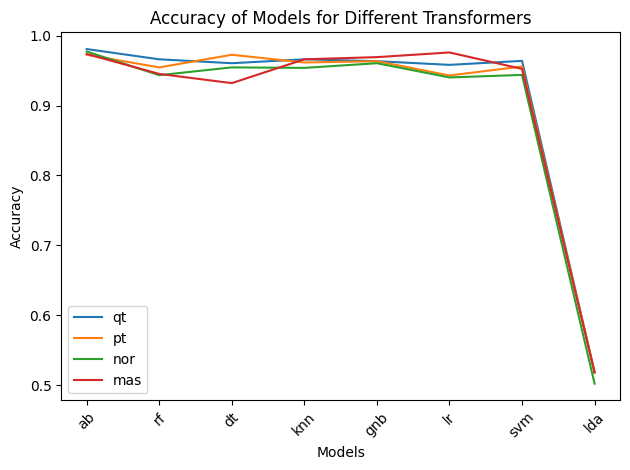

In [35]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
transformers = ['qt', 'pt','nor','mas']
models = ['ab', 'rf', 'dt', 'knn', 'gnb', 'lr', 'svm', 'lda']




# Collecting accuracies for each transformer
accuracies = {}
for transformer in transformers:
    accuracies[transformer] = [globals()[f"accuracy_{transformer}_{model}"] for model in models]

# Plotting
fig, ax = plt.subplots()

for transformer in transformers:
    ax.plot(models, accuracies[transformer], label=transformer)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Models for Different Transformers')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
